# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [49]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [9]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [10]:
base_model = make_pipeline(
    StandardScaler()
    ,KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [14]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0016216278076171876 (+/- 0.000644527534858877)
avg score time : 0.002691841125488281 (+/- 0.0010041524474649894)
avg test score : 0.96 (+/- 0.024944382578492935)


In [15]:
#bagging: 훈련 데이터의 일부를 가져와 여러모델을 훈련, 50%만 줌, 각각의 결합
# 지금 결과는 비슷하네
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.022267961502075197 (+/- 0.004762125193113618)
avg score time : 0.00927581787109375 (+/- 0.0020471529848186286)
avg test score : 0.9400000000000001 (+/- 0.04898979485566354)


##### 와인 데이터

In [16]:
base_model = make_pipeline(
    StandardScaler()
    ,KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [17]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.001629638671875 (+/- 0.0006148833071063928)
avg score time : 0.0025876522064208984 (+/- 0.0006409187666661572)
avg test score : 0.9493650793650794 (+/- 0.037910929811115976)


In [18]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.019437026977539063 (+/- 0.0035536833931383307)
avg score time : 0.007409238815307617 (+/- 0.00041060648428032314)
avg test score : 0.9495238095238095 (+/- 0.047757998331545745)


##### 유방암 데이터

In [19]:
base_model = make_pipeline(
    StandardScaler()
    ,KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0022659778594970705 (+/- 0.000645648665310699)
avg score time : 0.007555675506591797 (+/- 0.0010303003760284675)
avg test score : 0.9648501785437045 (+/- 0.009609970350036127)


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.023168230056762697 (+/- 0.002517584846845306)
avg score time : 0.015324020385742187 (+/- 0.0006444880756849301)
avg test score : 0.9630957925787922 (+/- 0.008582913674058454)


#### SVC

##### 붓꽃 데이터

In [31]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [32]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.002765321731567383 (+/- 0.0012548326068309787)
avg score time : 0.0007541179656982422 (+/- 0.00022132030835590334)
avg test score : 0.9666666666666666 (+/- 0.02108185106778919)


In [33]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.029662704467773436 (+/- 0.0021262794816068304)
avg score time : 0.003444385528564453 (+/- 0.0004619300109721538)
avg test score : 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [34]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [35]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.003843259811401367 (+/- 0.0015032180306238058)
avg score time : 0.0009438991546630859 (+/- 0.00016728688490885954)
avg test score : 0.9833333333333334 (+/- 0.022222222222222233)


In [36]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.02862658500671387 (+/- 0.0014664335055832992)
avg score time : 0.0037070274353027343 (+/- 0.0007997117367107906)
avg test score : 0.9553968253968254 (+/- 0.028236127772140192)


##### 유방암 데이터

In [37]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [38]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0070377826690673825 (+/- 0.0008218255650250528)
avg score time : 0.0018267154693603516 (+/- 0.0003032914263927309)
avg test score : 0.9736376339077782 (+/- 0.014678541667933545)


In [39]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03733372688293457 (+/- 0.0026298141602957036)
avg score time : 0.0075207710266113285 (+/- 0.0017715581691493587)
avg test score : 0.9701443875174661 (+/- 0.010490210803241348)


#### Decision Tree

##### 붓꽃 데이터

In [40]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [41]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0023079872131347655 (+/- 0.0012553342721334973)
avg score time : 0.0007210731506347656 (+/- 0.00025240349728502994)
avg test score : 0.9600000000000002 (+/- 0.03265986323710903)


In [42]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.026671838760375977 (+/- 0.0061405271230570895)
avg score time : 0.0025452136993408202 (+/- 0.00036487461569476845)
avg test score : 0.9333333333333333 (+/- 0.05577733510227169)


##### 와인 데이터

In [43]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [44]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0029858112335205077 (+/- 0.0013655222473337456)
avg score time : 0.0005419254302978516 (+/- 0.0001345939925984389)
avg test score : 0.8707936507936507 (+/- 0.07182500219132136)


In [45]:
# 오이제 좀 나오네
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.027426671981811524 (+/- 0.003933217894068872)
avg score time : 0.002432394027709961 (+/- 0.00037383599546408507)
avg test score : 0.9331746031746032 (+/- 0.05709080521688602)


##### 유방암 데이터

In [46]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [47]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.007768058776855468 (+/- 0.0007427281395082223)
avg score time : 0.0006442546844482421 (+/- 5.462614517544604e-05)
avg test score : 0.9173575531749728 (+/- 0.01830003449531157)


In [48]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.036178302764892575 (+/- 0.0027149917486339386)
avg score time : 0.0028723716735839845 (+/- 0.0004146672160427805)
avg test score : 0.9473218444340941 (+/- 0.025375381779688976)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [51]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [62]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [63]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0022280216217041016 (+/- 0.0005844364700998099)
avg score time : 0.0024313926696777344 (+/- 0.00042295980073934613)
avg test score : 0.47357748833823543 (+/- 0.13243123464477455)


In [64]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.01841592788696289 (+/- 0.002318468606173481)
avg score time : 0.009382867813110351 (+/- 0.00035009378310088497)
avg test score : 0.45797275071293014 (+/- 0.16152977683320352)


##### 당뇨병 데이터

In [65]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [66]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.002898120880126953 (+/- 0.002987392622655068)
avg score time : 0.001993751525878906 (+/- 0.00041666143298897874)
avg test score : 0.3689720650295623 (+/- 0.044659049060165365)


In [67]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.022211599349975585 (+/- 0.0056186421544667225)
avg score time : 0.010914087295532227 (+/- 0.0015635763153159152)
avg test score : 0.40943937653672585 (+/- 0.030047859328029232)


#### SVR

##### 보스턴 주택 가격 데이터

In [68]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [69]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.016048383712768555 (+/- 0.002734280451661747)
avg score time : 0.0023293495178222656 (+/- 8.003182929227785e-05)
avg test score : 0.17631266230186618 (+/- 0.5224914915128981)


In [70]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.05195364952087402 (+/- 0.004702171140381667)
avg score time : 0.008755683898925781 (+/- 0.00039274468994731797)
avg test score : 0.19861634195615813 (+/- 0.2822007169400042)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [71]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.012535762786865235 (+/- 0.00281408733750159)
avg score time : 0.002594137191772461 (+/- 0.0005270052637643849)
avg test score : 0.14659936199629434 (+/- 0.02190798003342928)


In [72]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.04104981422424316 (+/- 0.0049782401036502786)
avg score time : 0.007092046737670899 (+/- 0.00041986142413175906)
avg test score : 0.05980150520921741 (+/- 0.020738534538692045)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [73]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [74]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.005379867553710937 (+/- 0.0015891680777182235)
avg score time : 0.0008453845977783204 (+/- 9.147762654945748e-05)
avg test score : 0.03658798718002996 (+/- 0.9481582319824401)


In [75]:
# '궁합'이 잘 맞네
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.030564498901367188 (+/- 0.003003889238634101)
avg score time : 0.002426910400390625 (+/- 0.00015727679818211023)
avg test score : 0.48262791164837837 (+/- 0.2993575368728708)


##### 당뇨병 데이터

In [76]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [77]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.004788112640380859 (+/- 0.002384559055673387)
avg score time : 0.0013408184051513672 (+/- 0.0009563145853435446)
avg test score : -0.19702643729461222 (+/- 0.09801837280181375)


In [78]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.033690690994262695 (+/- 0.0048315497724731)
avg score time : 0.003054046630859375 (+/- 0.0007060244356758387)
avg test score : 0.31609617323281586 (+/- 0.07869892938775115)


In [ ]:
#tree 구조랑 적합한 형테인것을 눈으로 직접 확인해봤음

## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [79]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

### Random Forests 분류

In [86]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [87]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.1728966236114502 (+/- 0.02183469029517664)
avg score time : 0.010830879211425781 (+/- 0.0017877276264498337)
avg test score : 0.96 (+/- 0.024944382578492935)


In [88]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.1503396987915039 (+/- 0.00549725732190185)
avg score time : 0.008537960052490235 (+/- 0.0009173741365262614)
avg test score : 0.9720634920634922 (+/- 0.02484722784679302)


In [89]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.20397233963012695 (+/- 0.00815042588231155)
avg score time : 0.010046243667602539 (+/- 0.001971836646023455)
avg test score : 0.9596180717279925 (+/- 0.026347412347458833)


### Random Forests 회귀

In [90]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [91]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.31689000129699707 (+/- 0.008462205011881514)
avg score time : 0.008327817916870118 (+/- 0.0010405314325653567)
avg test score : 0.6401551466729415 (+/- 0.19086160240929964)


In [92]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.26198878288269045 (+/- 0.01009767710248006)
avg score time : 0.007925844192504883 (+/- 0.0009433580875102568)
avg test score : 0.42100490465753815 (+/- 0.04071672586164021)


### Extremely Randomized Trees 분류

In [93]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [95]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.09789175987243652 (+/- 0.00579984477043319)
avg score time : 0.008822965621948241 (+/- 0.0003998725646719685)
avg test score : 0.9533333333333334 (+/- 0.03399346342395189)


In [96]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.09804115295410157 (+/- 0.010696215545949983)
avg score time : 0.009091901779174804 (+/- 0.0009999499911947408)
avg test score : 0.9833333333333332 (+/- 0.022222222222222233)


In [97]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.11521930694580078 (+/- 0.010002035489018742)
avg score time : 0.009284400939941406 (+/- 0.000768738753409806)
avg test score : 0.9683744760130415 (+/- 0.01423579379053394)


### Extremely Randomized Trees 회귀

In [98]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [99]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.17729926109313965 (+/- 0.007475844115709335)
avg score time : 0.00788893699645996 (+/- 0.0003727538452801587)
avg test score : 0.6064210797666632 (+/- 0.28535843359428814)


In [100]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.1646562099456787 (+/- 0.009659746807249079)
avg score time : 0.00953369140625 (+/- 0.0010879097856244869)
avg test score : 0.4266022517515551 (+/- 0.03964369592419241)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [103]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [109]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13


In [132]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators = n_estimators),
          ExtraTreesClassifier(n_estimators = n_estimators)]

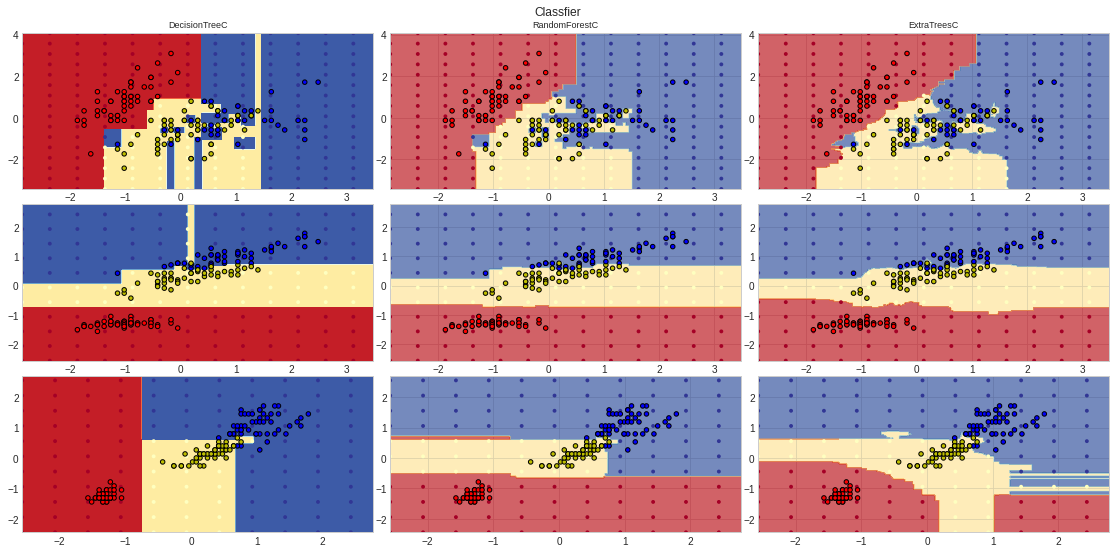

In [133]:
plt.figure(figsize = (16,8))

for pair in ([0,1],[0,2],[2,3]):
    for model in models:
        X = iris.data[:,pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis = 0)
        std = X.std(axis = 0)
        X = (X-mean)/ std

        model.fit(X,y)

        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classfier')]

        plt.subplot(3,3,plot_idx)

        if plot_idx <= len(models):
            plt.title(model_title, fontsize = 9)

        x_min,x_max = X[:,0].min()-1, X[:,0].max()+1
        y_min,y_max = X[:,1].min()-1, X[:,1].max()+1       
        xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx,yy,Z ,cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx,yy,Z ,alpha = estimator_alpha,cmap=cmap)# 조금 흐리게 그려주려고

        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min,x_max, plot_step_coarser),
                                                 np.arange(y_min, y_max,plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                                   yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_point = plt.scatter(xx_coarser, yy_coarser, s=15,
                                   c=Z_points_coarser, cmap=cmap,
                                   edgecolor = 'none')
            
        plt.scatter(X[:,0 ], X[:,1], c=y,
                        cmap = ListedColormap(['r','y','b']),
                        edgecolor = 'k', s = 20)
        plot_idx += 1

plt.suptitle('Classfier',fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad = 2.5)
plt.show()

In [142]:
plot_idx=1
models = [DecisionTreeRegressor(max_depth = None),
          RandomForestRegressor(n_estimators = n_estimators),
          ExtraTreesRegressor(n_estimators = n_estimators)]

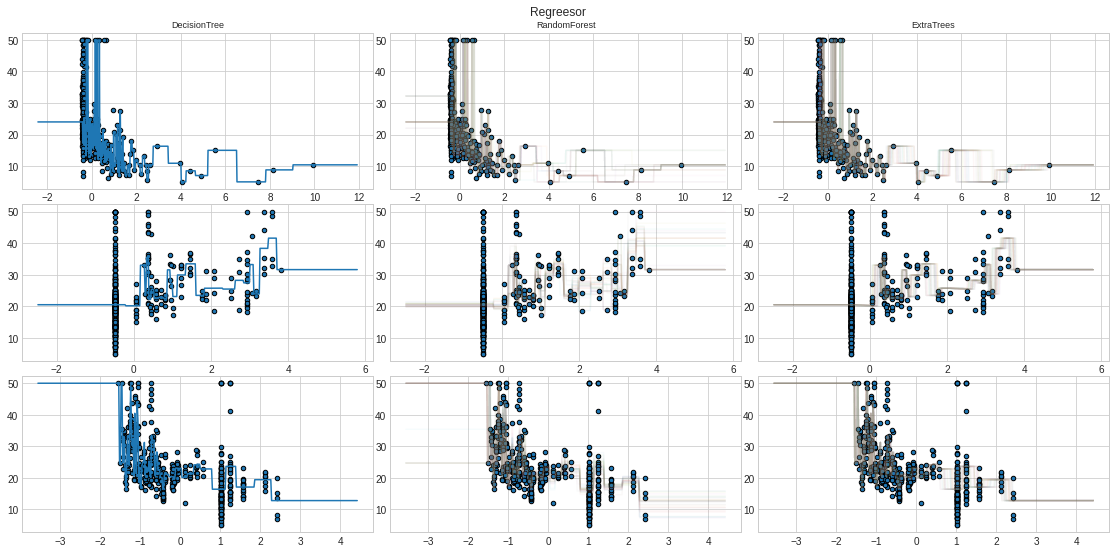

In [143]:
plt.figure(figsize = (16,8))

for pair in (0,1,2):
    for model in models:
        X= boston.data[:,pair]
        y = boston.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X= X[idx]
        y = y[idx]

        mean = X.mean(axis = 0)
        std = X.std(axis = 0)
        X= (X-mean)/ std

        model. fit(X.reshape(-1,1),y)
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize = 9)

        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1

        xx,yy = np.arange(x_min-1, x_max+1,plot_step), np.arange(y_min-1,y_max+1, plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z= model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx,Z)
        else:
            estimator_alpha = 1.0/ len(model.estimators_)
            for tree in model.estimators_:
                Z= tree.predict(xx.reshape(-1,1))
                cs=plt.plot(xx,Z,alpha = estimator_alpha)
        
        plt.scatter(X,y,edgecolors = 'k', s = 20)
        plot_idx += 1
plt.suptitle('Regreesor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad=0.2, pad=2.5)
plt.show()
# 이 셀만 반복하면 plot_idx가 10으로 다시 돌려져서 윗셀까지 같이 돌려야함

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [144]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [145]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [146]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.06554489135742188 (+/- 0.002329844196780606)
avg score time : 0.006864356994628906 (+/- 0.0006709830028051528)
avg test score : 0.9466666666666667 (+/- 0.03399346342395189)


In [147]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.08238768577575684 (+/- 0.011723932291937958)
avg score time : 0.008984231948852539 (+/- 0.0027902920829891015)
avg test score : 0.8085714285714285 (+/- 0.16822356718459935)


In [148]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.15451960563659667 (+/- 0.009723463514969872)
avg score time : 0.008634471893310547 (+/- 0.0011778620125084478)
avg test score : 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [149]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [150]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.09448943138122559 (+/- 0.010507706539555446)
avg score time : 0.003941488265991211 (+/- 0.00020317383916783091)
avg test score : 0.5985744583807469 (+/- 0.20937548598257683)


In [151]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.09736828804016114 (+/- 0.021036584444424525)
avg score time : 0.004317617416381836 (+/- 0.0006867191917567753)
avg test score : 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [153]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [154]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,y=iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.19435415267944336 (+/- 0.021562106664652126)
avg score time : 0.0012513160705566405 (+/- 0.00020630135777999147)
avg test score : 0.96 (+/- 0.024944382578492935)


In [155]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,y=wine.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.22954196929931642 (+/- 0.003110694292460093)
avg score time : 0.0009840965270996095 (+/- 2.3863591778441512e-05)
avg test score : 0.9330158730158731 (+/- 0.04127777701479872)


In [156]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data,y=cancer.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.4226572036743164 (+/- 0.012319098173587246)
avg score time : 0.0010911941528320313 (+/- 0.00013452711229875017)
avg test score : 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [157]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [158]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.11931877136230469 (+/- 0.0019368784075988448)
avg score time : 0.0009593963623046875 (+/- 1.6060283229843816e-05)
avg test score : 0.6752372690883461 (+/- 0.16121836382662494)


In [159]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,y=diabetes.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.09468264579772949 (+/- 0.006564523043400875)
avg score time : 0.000981283187866211 (+/- 1.4859733213282814e-05)
avg test score : 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [160]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [162]:
model1 = SVC()
model2= GaussianNB()
model3= RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1), ('naive',model2), ('forest',model3)],
    voting = 'hard' # 가장 많이 예측된 모델을 채택함
)

In [170]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(),scores.std(),model_name))

accuracy: 0.97 (+/- 0.02) [SVC]
accuracy: 0.95 (+/- 0.03) [GaussianNB]
accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
accuracy: 0.95 (+/- 0.03) [VotingClassifier]


In [178]:
str(type(model1)).split('.')[-1][:-2]

'SVC'

In [180]:
model1 = SVC(probability = True)
model2= GaussianNB()
model3= RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1), ('naive',model2), ('forest',model3)],
    voting = 'soft', # 
    weights = [2,1,2]
)

In [181]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(),scores.std(),model_name))

accuracy: 0.97 (+/- 0.02) [SVC]
accuracy: 0.95 (+/- 0.03) [GaussianNB]
accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product


In [192]:
X = iris.data[:, [0,2]]
y = iris.target

In [196]:
model1 = DecisionTreeClassifier(max_depth = 4)
model2 = KNeighborsClassifier(n_neighbors = 7)
model3 = SVC(gamma = 0.1 , kernel = 'rbf', probability = True )
vote_model = VotingClassifier(estimators = [('dt',model1), ('knn', model2),('svc',model3)],
                                            voting = 'soft', weights=[2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [197]:
x_min, x_max = X[:,0].min()-1, X[:, 0].max()+1 
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

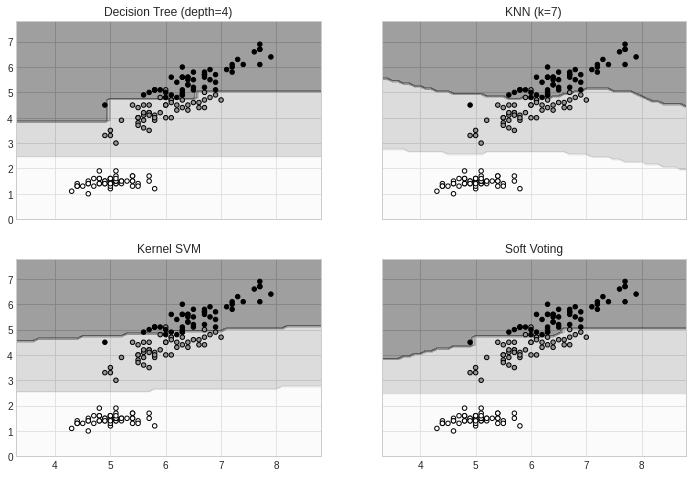

In [198]:
f, axarr = plt.subplots(2,2,sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,vote_model],
                          ['Decision Tree (depth=4)','KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
    Z= model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z= Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx,yy,Z ,alpha= 0.4)
    axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y ,s= 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# softvoting이 3개를 다 투표받아서 섞ㅇ어버렷네 

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [207]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators = [('linear',model1), ('gbr', model2),('rfr',model3)],
                                         weights=[2,1,2])

# 가중치

In [208]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('R2: %0.2f (+/-%0.2f) [%s]'%(scores.mean(),scores.std(),model_name))

R2: 0.35 (+/-0.38) [LinearRegression]
R2: 0.68 (+/-0.16) [GradientBoostingRegressor]
R2: 0.62 (+/-0.22) [RandomForestRegressor]
R2: 0.63 (+/-0.22) [VotingRegressor]


### 회귀식 시각화

In [204]:
X= boston.data[:,0].reshape(-1,1)
y = boston.target

In [209]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators = [('linear',model1), ('gbr', model2),('rfr',model3)],
                                         weights=[1,1,1])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)


In [211]:
x_min, x_max = X.min()-1, X.max()+1
xx= np.arange(x_min-1,x_max+1,0.1)

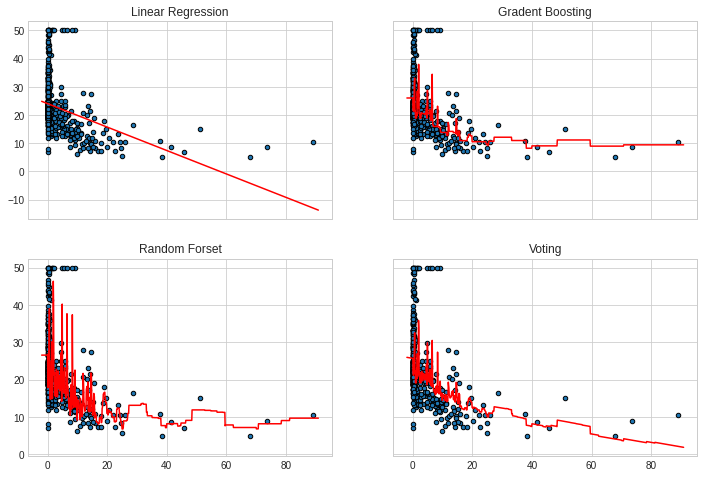

In [213]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,vote_model],
                          ['Linear Regression', 'Gradent Boosting', 'Random Forset', 'Voting']):
    Z = model.predict(xx.reshape(-1,1))

    axarr[idx[0], idx[1]].plot(xx,Z,c='r')
    axarr[idx[0], idx[1]].scatter(X,y ,s=20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [214]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [215]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [217]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [219]:
cross_val = cross_validate(
    estimator = reg,
    X = boston.data,y=boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.14387102127075196 (+/- 0.005103330997316092)
avg score time : 0.0029619216918945314 (+/- 0.0002339258028323099)
avg test score : 0.3198912914190616 (+/- 0.3344184433374771)


#### 회귀식 시각화

In [ ]:
X= boston.data[:,0].reshape(-1,1)
y = boston.target

In [220]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg =StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = reg.fit(X,y)


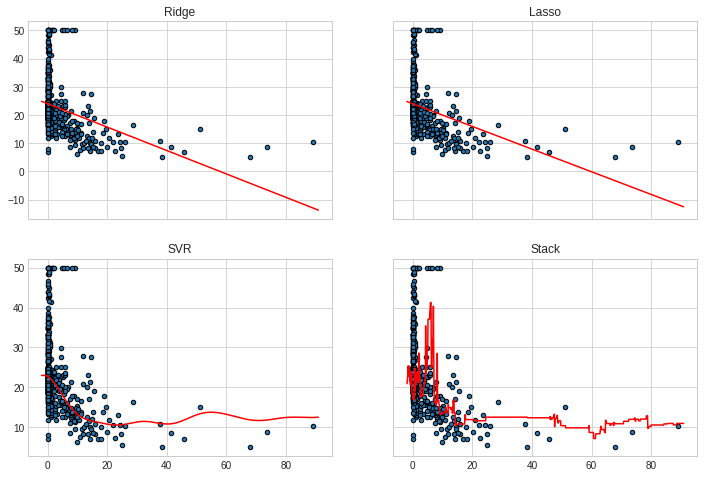

In [221]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,vote_model],
                          ['Ridge', 'Lasso','SVR', 'Stack']):
    Z = model.predict(xx.reshape(-1,1))

    axarr[idx[0], idx[1]].plot(xx,Z,c='r')
    axarr[idx[0], idx[1]].scatter(X,y ,s=20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [227]:
estimators = [('logistic', LogisticRegression(max_iter = 10000)),
               ('svc',SVC()),
               ('naive',GaussianNB())]

In [228]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)


In [229]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y=iris.target,
    cv =5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.29587364196777344 (+/- 0.007193948536582467)
avg score time : 0.008888149261474609 (+/- 0.0004772324258957842)
avg test score : 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [230]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product


X = iris.data[:, [0,2]]
y = iris.target

model1 = LogisticRegression(max_iter = 10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = vote_model.fit(X,y)

x_min, x_max = X[:,0].min()-1, X[:, 0].max()+1 
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))


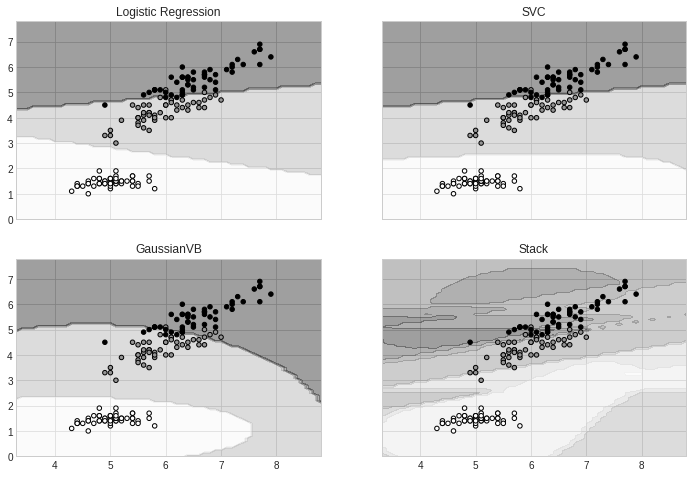

In [231]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,stack],
                          ['Logistic Regression', 'SVC', 'GaussianVB', 'Stack']):


    Z= model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z= Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx,yy,Z ,alpha= 0.4)
    axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y ,s= 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()